## Random Forest

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('agricultural sustainability.csv')
df.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [3]:
# Feature and target selection
X = df.drop('sustainability', axis=1)
y = df['sustainability']

In [4]:
# Splitting the dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create model and train it
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the test set
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [7]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score', acc)

Accuracy Score 0.925


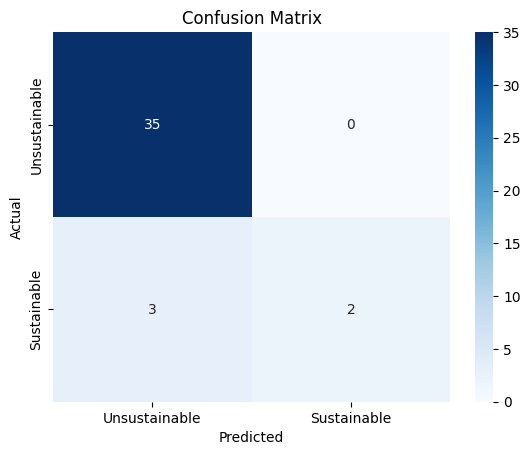

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
           xticklabels=['Unsustainable', 'Sustainable'],
           yticklabels=['Unsustainable', 'Sustainable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Classification Report
cr = classification_report(y_test, y_pred, target_names=['Unsustainable', 'Sustainable'])
print(cr)

               precision    recall  f1-score   support

Unsustainable       0.92      1.00      0.96        35
  Sustainable       1.00      0.40      0.57         5

     accuracy                           0.93        40
    macro avg       0.96      0.70      0.77        40
 weighted avg       0.93      0.93      0.91        40



In [10]:
# Save the model
import joblib
joblib.dump(rfc, 'agricultural_sustainability_model.pkl')

['agricultural_sustainability_model.pkl']